<a href="https://colab.research.google.com/github/Kishan-2112/-Data-Science-Business-Analytics-Internship-at-The-Sparks-Foundation/blob/main/Task_1_Predicting_using_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIP : The Sparks Foundation** 

###**Data Science & Business Analytics Intern**

### **Author: Kishan Pithadiya**

### **Task - 1 Predicting using Supervised Machine Learning**



In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Steps:**

Step 1 - Importing the dataset

Step 2 - Visualizing the dataset

Step 3 - Data preparation

Step 4 - Training the Model

Step 5 - Visualizing the model

Step 6 - Making predcitions

Step 7 - Evaluating the model

### **STEP 1 - Importing the dataset**

In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data

In [ ]:
# Importing all the required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [ ]:
# Reading data using pandas

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [ ]:
# now let's observe the dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# To find the number of columns and rows 
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# now we will check if our dataset contains null or missings values  
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see we do not have any null values in our data set. 

In [ ]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **STEP 2 - Visualizing the dataset**

In this we will plot the dataset to check whether we can observe any relation between the two variables or not

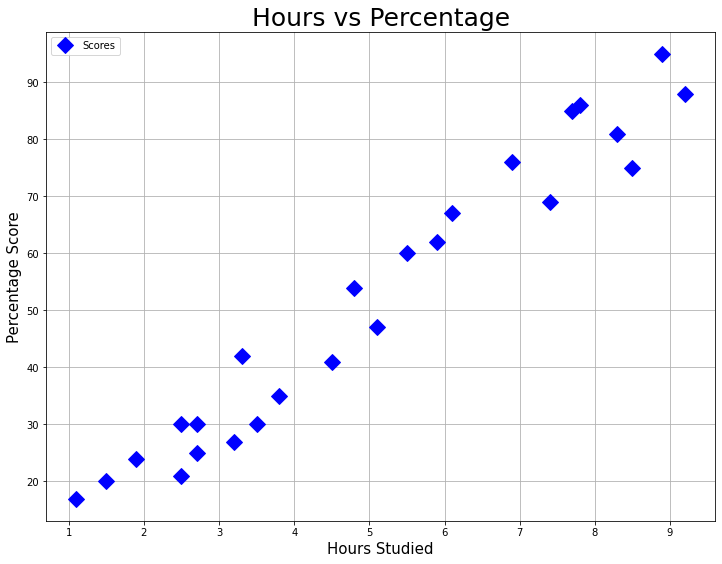

In [ ]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [12,9]
df.plot(x='Hours', y='Scores', style='D', color='blue', markersize=12)
plt.title('Hours vs Percentage',fontsize = "25")  
plt.xlabel('Hours Studied',fontsize = "15")  
plt.ylabel('Percentage Score',fontsize = "15")  
plt.grid()
plt.show()

From the graph, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.

In [ ]:
# we can also use .corr to determine the corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We will check for the outliers.

In [ ]:
df["z_score_Hours"] = (df.Hours-df.Hours.mean())/df.Hours.std()
df["z_score_Scores"] = (df.Scores-df.Scores.mean())/df.Scores.std()
df.head()

,Hours,Scores,z_score_Hours,z_score_Scores
0,2.5,21,-0.994814,-1.205368
1,5.1,47,0.034850,-0.177167
2,3.2,27,-0.717597,-0.968091
3,8.5,75,1.381335,0.930126
4,3.5,30,-0.598790,-0.849452


In [ ]:
#Find Outliers for Hours
df[(df.z_score_Hours> 3) | (df.z_score_Hours< -3)]

,Hours,Scores,z_score_Hours,z_score_Scores


In [ ]:
#Find Outliers for Scores
df[(df.z_score_Scores> 3) | (df.z_score_Scores< -3)]

,Hours,Scores,z_score_Hours,z_score_Scores


In [ ]:
Mean_Hours = df.Hours.mean()
Mean_Scores = df.Scores.mean()
Mean_Hours,Mean_Scores

(5.012, 51.48)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


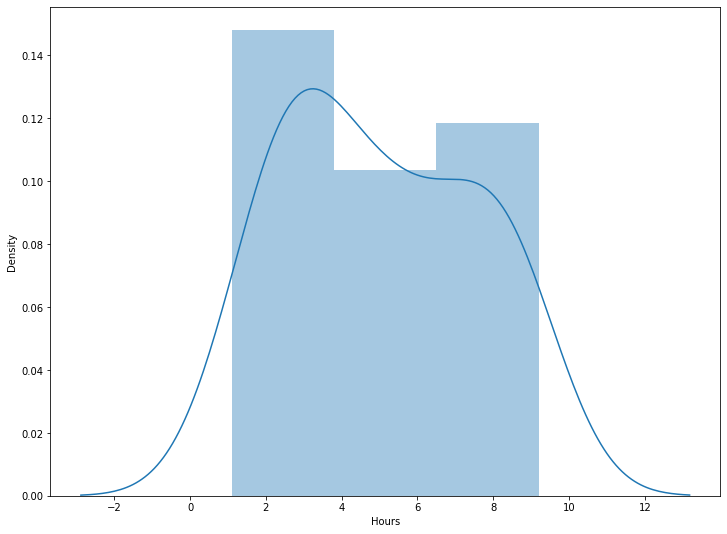

In [ ]:
sns.distplot(df.Hours,kde = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


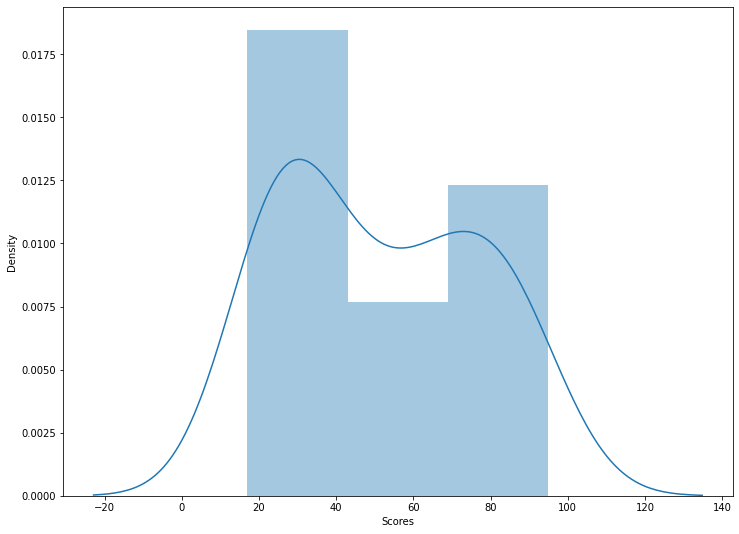

In [ ]:
sns.distplot(df.Scores,kde = True)

### **STEP 3 - Data preparation**

In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data.

In [ ]:
df.head()

,Hours,Scores,z_score_Hours,z_score_Scores
0,2.5,21,-0.994814,-1.205368
1,5.1,47,0.034850,-0.177167
2,3.2,27,-0.717597,-0.968091
3,8.5,75,1.381335,0.930126
4,3.5,30,-0.598790,-0.849452


We can definatly say that here **Hour** is a **Independent variable** and **Score** is a **Dependent variable**

In [ ]:
# using iloc function we will divide the data 
X = df.iloc[:, :1].values  
y = df.iloc[:, 1].values

In [ ]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=50)

### **STEP 4 - Training the model**

We have splited our data into training and testing sets, and now we will train our Model.

In [ ]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

### **STEP 5 - Visualizing the model**

After training the model, now we visualize the model

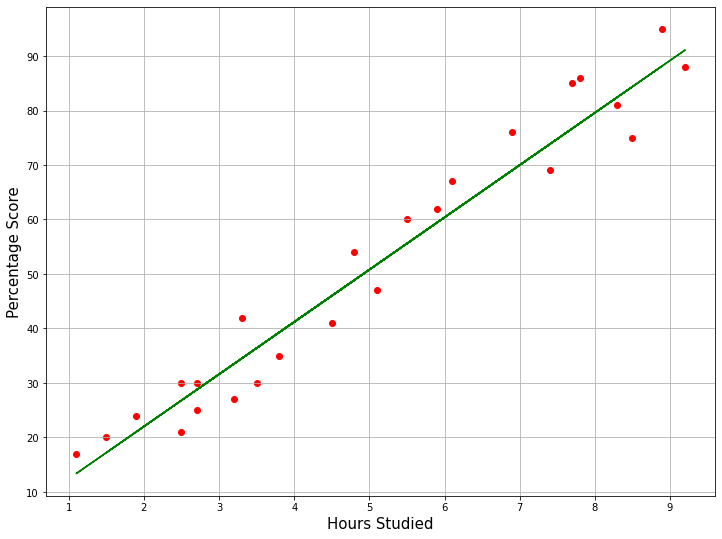

In [ ]:
m = reg.coef_
c = reg.intercept_
line = m*X + c
# Plotting for the training data
plt.rcParams["figure.figsize"] = [12,9]
plt.scatter(X,y,color='red')
plt.plot(X, line, color='green')
plt.xlabel('Hours Studied',fontsize = "15")  
plt.ylabel('Percentage Score',fontsize = "15") 
plt.grid()
plt.show()

### **STEP 6 - Making Predictions**

Now we have trained our algorithm, it's time to make some predictions.

In [ ]:
y_pred = reg.predict(X_test) # Predicting the scores

In [ ]:
#Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':y_test,'Predicted':y_pred})
comp

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


In [ ]:
# Testing with your own data

hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.56986604454478


Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 91.56986604454478

### **STEP 7 - Evaluating the model**

In the last step, we are going to evaluate our trained model by calculating mean absolute error and R2 Score

In [ ]:
from sklearn import metrics  

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score:  0.971014141329942
